In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

In [2]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 25.33@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.C(1, 1, 'out5', capacitance)
circuit1.L(1, 'out5', circuit1.gnd, inductance)
# Q = 1
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.C(2, 2, 'out1', capacitance)
circuit1.L(2, 'out1', circuit1.gnd, inductance)
# Q = 2
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.C(3, 3, 'out2', capacitance)
circuit1.L(3, 'out2', circuit1.gnd, inductance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.C(4, 4, 'out4', capacitance)
circuit1.L(4, 'out4', circuit1.gnd, inductance)

#high
# circuit1.R(5, 'in', 5, 400@u_Ω)
# circuit1.C(5, 5, 'out5', capacitance)
# circuit1.L(5, 'out5', circuit1.gnd, inductance)

#low
# circuit1.R(5, 'in', 5, 400@u_Ω)
# circuit1.L(5, 5, 'out5', inductance)
# circuit1.C(5, 'out5', circuit1.gnd, capacitance)

2020-12-22 13:07:38,342 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword


Inductor L4

In [3]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

In [4]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1000.0 Hz
Factor of quality = 6.4


2020-12-22 13:07:41,405 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,406 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,414 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,415 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,419 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,420 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,424 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 13:07:41,425 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


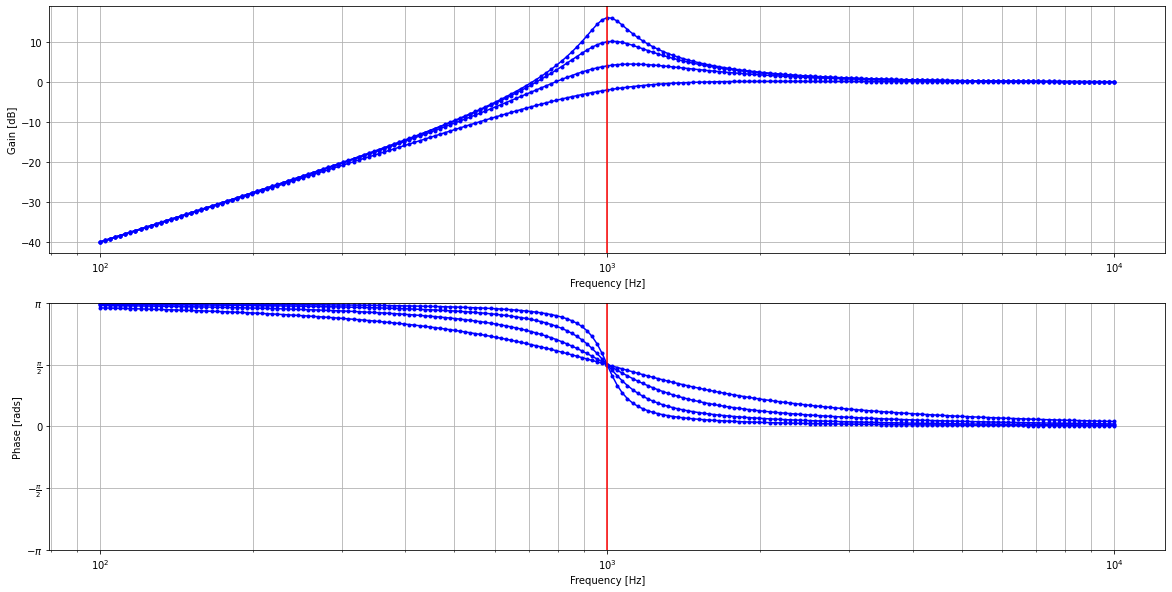

In [5]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')